# Введение. Нейронные сети

В машинном обучении особое место занимают нейронные сети. Как можно догадаться из названия, нейронная сеть была создана на основе нейронов в мозгу человека.

Нейронные сети хорошо себя зарекомендовали в анализе изображений, так называемое компьютерное зрение. Они хороши в:
* Классификации - отделении среди всех картинок заранее распределенных групп, например, деление на кошек и собак.
* Предсказание — возможность предсказывать следующий шаг. Например, рост или падение акций, основываясь на ситуации на фондовом рынке.
* Распознавание — самым простым примером является распознавание вашего лица камерой телефона.

Нейронные сети имеют свои плюсы:
1. Устойчивость к шумам входных данных
2. Адаптация к изменениям при обучении
3. Быстродействие

Однако нейронные сети редко дают точные ответы и являются лишь дополнением к решениям человека. Например, в медицине нейронные сети используются для анализа медицинских изображений, однако чаще всего не дают точного диагноза, а всего лишь предсказывают вероятность того или иного заболевания.

## Строение нейронной сети

Нейрон похож на функцию: он принимает на вход несколько значений и возвращает одно. Важно помнить, что нейроны оперируют числами в диапазоне [0,1] или [-1,1], а числа, выходящие за этот диапозон, необходимо нормализовать.


Ниже представлена схема работы искуссвенного нейрона.

У нейрона есть $n$ входов $x_i$, у каждого из которого есть вес $w_i$, на который умножается сигнал, проходящий по связи. После этого взвешенные сигналы $x_i*w_i$ направляются в сумматор, который аггрегирует все сигналы во взвешенную сумму. Эту сумму также называют net. Таким образом, $
net=\sum\limits_{i=1}^n w_i*x_i$.

Далее к полученной сумме применяют функцию активации, которая преобразует взвешенную сумму в какое-то число, которое и будет являться выходом нейрона. Функция активации обозначается ϕ(net). Таким образом, выходов искусственного нейрона является ϕ(net).

In [34]:
from IPython.display import Image 
from IPython.core.display import HTML 
Image(url= "http://neerc.ifmo.ru/wiki/images/a/a5/Искусственный_нейрон_схема.png", width=500)

Если вы объедините эти нейроны, то получите прямо распространяющуюся нейронную сеть — процесс идёт от ввода к выводу, через нейроны, соединённые связями с значениями весов (синапсами). От веса зависит степень важности признака $x_i$, которая меняется в процессе обучения. Во время инициализации нейронной сети, веса расставляются в случайном порядке. 

Для обучения сети в прямо распространяющейся нейронной сети вы проходите все нейроны до выходного слоя, а затем сеть подстраивает веса $w_i$ с помощью метода обратного распространения ошибки.

В нейронной сети есть два обязательных слоя: входной и выходной, а слои посередине называются скрытыми.

Количество нейронов в выходном слое зависит от задачи. Например, в случае классификации количество выходных нейронов равно тому количеству классов, на которые делится выборка изображений.

In [35]:
Image(url= "https://cdn.tproger.ru/wp-content/uploads/2016/08/15GSpUs2hWFx4Lq2_KCyulg.png", width=400)

## Функции активации

Поговорим о функциях активации. По сути, это всего лишь некоторая функция, которая применяется к после сумматора, для получения нужного ответа. Их много, например, Линейная, Сигмоид (Логистическая),Гиперболический тангенс. В данной лабораторной мы применим две функции, ReLU(Rectified linear unit) и Softmax, однако подробно рассматривать их не будем.

В случае ReLU $f(x) = max(0,x)$. Пользуясь определением, становится понятно, что ReLu возвращает значение х, если х положительно, и 0 в противном случае.

Функция Softmax применяется в машинном обучении для задач классификации, когда количество возможных классов больше двух, и обычно на выходном слое. Сумма всех выходных сигналов при этом равна 1 (то есть каждое значение это вероятность принадлежности данного изображения к классу).



## Валидационная выборка

Отметим еще один важный момент. В прошлых лабораторных мы делили наш датсет на обучающую и тестовую выборку. Однако сегодя мы рассмотрим еще одну выборку, на которую можно делить датасет. Это так называемая валидационная выборка (validation или иногда development set).

Тогда датасет делится на:
* Обучающую выборку, на которой запускается алгоритм обучения;
* Валидационную, которая используется для настройки параметров, выбора признаков и принятия других решений относительно алгоритма обучения, иногда такую выборку называют удерживаемой для перёкрестной проверки (hold-out cross validation set);
* Тестовую, на которой оценивают качество работы алгоритма, но на её основе не принимают никаких решений о том, какой алгоритм обучения или параметры использовать.

#Основные шаги по выполнению лабораторной работы

##1. Импортируем необходимые библиотеки

В данной лабораторной работе мы будем использовать библиотеку Tensorflow. TensorFlow — открытая программная библиотека для машинного обучения, разработанная компанией Google для решения задач построения и тренировки нейронной сети с целью автоматического нахождения и классификации образов, достигая качества человеческого восприятия.

Для работы с сетями глубокого обучения мы будем использовать нейросетевую библиотеку Keras, являющуюся надстройкой над Tensorflow.

В Keras уже есть встроенные датасеты, например, fashion_mnist и мы воспользуемся им для построения нейронной сети. Также нам понабится уже знакомая библиотека numpy и matplotlib для отрисовки графиков.



In [0]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

##2. Подготовка данных

Мы будем работать с датасетом fashion_mnist, представляющим собой набор картинок одежды, обуви или сумок.

Разделим датасет на обучающую и тестовую выборки.

In [0]:
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

И создадим список с названиями классов:

In [0]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Так как мы работаем с изображениями, а не с числами, следует понять, как они представлены в компьютере. Наши изображения на самом деле являются набором точек разного цвета. Более научно - двумерными массивами, содрежащими числа, которые харктеризуют интенсивность пикселя для черно-белого изображения. В таком случае значение 0 будет значить черный пиксель, а 255 белый. Позже мы нормализуем эти значения, чтобы они были от нуля до единицы.

Посмотрим картинки из нашего набора данных:

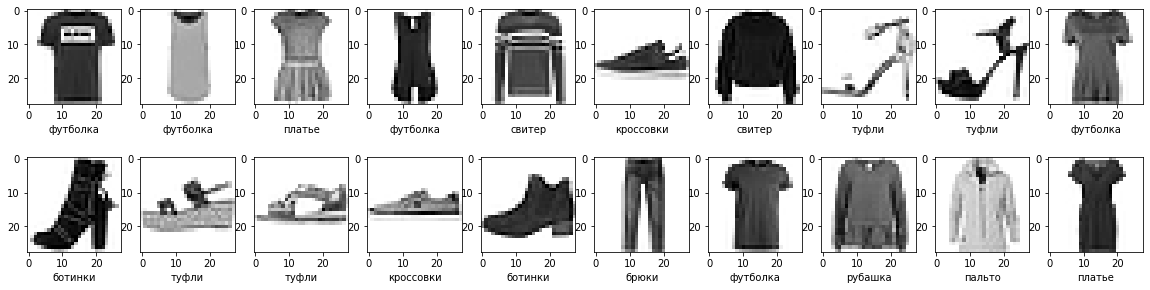

In [39]:
plt.figure(figsize=(20,5))
for i in range(1,21):
    plt.subplot(2,10,i)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

Нейронная сеть принимает на вход плоский вектор, а не двумерные изображения, которые имеются в fashion_mnist. Так что мы преобразуем размерность наших данных:


In [0]:
X_train = X_train.reshape(60000, 784) # 60000 изображений по 784 пикселя в каждом
X_test = X_test.reshape(10000, 784)

Дальше мы нормализуем данные. Нормализация данных необходима, чтобы в своих результатах не зависить от величин переменных, а только от их соотношения. Здесь мы используем деление на 255 для приведения значения пикселей в диапозон от 0 до 1.

In [0]:
X_train = X_train / 255 
X_test = X_test / 255 

Входные данные мы подготовили, теперь давайте поговорим о выходных. Наша задача, чтобы при подачи картинки в нейронную сеть, она смогла сказать нам, является ли эта вещь футболкой, обувью, сумкой и т.д. Предсказания нашей нейронной сети записаны с помощью списка из 10 классов, где все значения равны 0, кроме предсказанного класса, равного 1. Это называется подход one hot encoding.

То есть если картинка была определена как футболка (1 в списке classes), то программа выдаст [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]. 

А если как рубашка (7 в списке classes), то [0, 0, 0, 0, 0, 0, 1, 0, 0, 0].

С помощью следующего кода мы превратим наш y_train и y_test в такие же массивы, понятные нейронной сети. И сравним y_train до и после.


In [42]:
y_train[0]

9

In [0]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [44]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

##3. Создание нейронной сети

При создании нейронной сети мы будем использовать модель Sequental из библиотеки Keras, в которой все слои сети идут последовательно друг за другом.

Объявим модель:

In [0]:
model = Sequential()

И создадим два полносвязных слоя: входной и выходной.

Входным слоем является тот, который принимает наши данные. Зададим здесь количество нейронов (800), количество пикселей (784 или для сети 784 входа в каждый нейрон) и активационную функцию (ReLU).

На выходном слое мы укажем количество классов, которые получатся при предсказании (10) и и активационную функцию (Softmax).

In [0]:
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

Далее мы скомпилируем нашу модель и посмотрим на ее описание.

Здесь мы используем функцию ошибки категориальная перекрестная энтропия (вместо метода наименьших квадратов),  стохастический градиентный спуск (SGD) в качестве оптимизатора и точность в метрике.

In [47]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


##4. Обучение нейронной сети

Теперь обучим сети с помощью метода fit. Здесь же мы задаем некоторые параметры при обучении:

* batch_size - размер мини-выборки для стохастического градиентного спуска. Мы берем batch_size изображений, прогоняем через сеть, меняем веса и повторяем процедуру.
* epochs - количество эпох, то есть сколько раз мы будем обучаться на полном наборе данных
* validation_split - деление нашей обучающей выборки на обучающую и валидационную
* verbose - отвечает за подробность изображения отчета при обучении (0, 1 или 2)

В выводе обучения мы можем увидеть информацию по каждой эпохе: количество использованных изображений, время выполнения, функция ошибки и точность (доля правильных ответов), а также последние два параметра для валидационной выборки.

In [48]:
model.fit(X_train, y_train, batch_size=200, epochs=100, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 30us/sample - loss: 1.1940 - acc: 0.6527 - val_loss: 0.8384 - val_acc: 0.7442
Epoch 2/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.7634 - acc: 0.7632 - val_loss: 0.6953 - val_acc: 0.7771
Epoch 3/100
48000/48000 [==============================] - 1s 28us/sample - loss: 0.6652 - acc: 0.7906 - val_loss: 0.6325 - val_acc: 0.7978
Epoch 4/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.6128 - acc: 0.8076 - val_loss: 0.5919 - val_acc: 0.8081
Epoch 5/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.5782 - acc: 0.8149 - val_loss: 0.5631 - val_acc: 0.8162
Epoch 6/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.5533 - acc: 0.8217 - val_loss: 0.5433 - val_acc: 0.8200
Epoch 7/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.5344 - acc: 0.8264 - val_l

Обученную сеть так же можно сохранить для дальнейшего использоавния, чтобы не тратить постоянно время на обучение:

In [0]:
model.save('fashion_mnist_dense.h5')

Тогда загрузить ее можно таким образом:

In [0]:
from tensorflow.keras.models import load_model
new_model = load_model('fashion_mnist_dense.h5')

##5. Оценка качества обучения

Для начала посмотрим на значения val_acc  в выводе выше. Можно заметить, что в начале обучения точность растет, но к концу начинает то подниматься, то опускаться (97-100 эпохи).  Это один из явных признаков переобучения.
Еще если val_loss ошибка увеличивается, а loss уменьшается, это также говорит о переобучении.

Также давайте используем наш тестовый датасет для предсказания и выведем точность (здесь выводится самый простой вариант определения точности, однако не самый лучший):

In [51]:
scores = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 79us/sample - loss: 0.3791 - acc: 0.8665


In [52]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 86.65


Вы можете загружать собственные картинки в нейронную сеть, но посмотрим для примера распознавание одной картинки из тестового датасета (например 354ой):

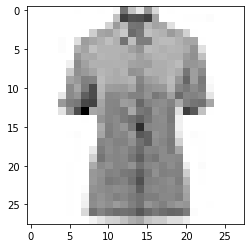

In [53]:
plt.imshow(X_test[354].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Предскажем класс изображения, передав в predict 354ую картинку из тестового набора X, с преобразованной размерностью (np.expand_dims)

In [0]:
prediction = model.predict(np.expand_dims(X_test[354], axis=0))

In [55]:
prediction

array([[1.5555759e-01, 3.0522147e-04, 1.4832080e-02, 1.4116846e-01,
        3.3127155e-02, 6.6951480e-07, 6.5084672e-01, 2.4711373e-06,
        4.1583139e-03, 1.2887119e-06]], dtype=float32)

Выведем предсказанный класс и реальный класс:

In [56]:
prediction = np.argmax(prediction[0])
print("Это изображение предсказано как", prediction, "класс, то есть это", classes[prediction])


Это изображение предсказано как 6 класс, то есть это рубашка


In [57]:
label = np.argmax(y_test[354])
print("Это изображение является", label, "классом, то есть это",  classes[label])

Это изображение является 6 классом, то есть это рубашка


##6. Увеличение качества обучения

Для увеличения точности работы нейронной сети можно изменять ее параметры.
Основыными параметрами для изменения являются:
1. Количество эпох обучения.
2. Размер мини-выборки.
3. Количество нейронов входного слоя.
4. Наличие скрытых слоев.

### Количество эпох обучения и размер мини выборки

Данные параметры задаются при обучении модели.


In [58]:
history = model.fit(X_train, y_train, 
                    batch_size=200,        # Размер мини-выборки
                    epochs=100,            # Количество эпох
                    validation_split=0.2, 
                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3165 - acc: 0.8901 - val_loss: 0.3573 - val_acc: 0.8739
Epoch 2/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3160 - acc: 0.8900 - val_loss: 0.3551 - val_acc: 0.8759
Epoch 3/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3149 - acc: 0.8904 - val_loss: 0.3569 - val_acc: 0.8742
Epoch 4/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3139 - acc: 0.8910 - val_loss: 0.3518 - val_acc: 0.8768
Epoch 5/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3133 - acc: 0.8917 - val_loss: 0.3580 - val_acc: 0.8744
Epoch 6/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3124 - acc: 0.8916 - val_loss: 0.3519 - val_acc: 0.8778
Epoch 7/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3117 - acc: 0.8916 - val_l

### Количество нейронов входного слоя

Количество нейронов задается при создании входного слоя. Здесь оно 200.

In [0]:
model.add(Dense(200, input_dim=784, activation="relu"))

### Наличие скрытых слоев

Скрытыми слоями называются слои, находящиеся между входным и выходным. Они добавляются в последовательную модель, как и входной и выходной слой.

In [0]:
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(600, activation="relu"))  # Новый скрытый слой
model.add(Dense(10, activation="softmax"))

#Задание

Возьмите созданную нейронную сеть, датасет fashion-mnist и попытайтесь улучшить точность обучения. Варианты для улучшения:
1. Используйте разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
4. Используйте разное количество эпох: 10, 15, 20, 25, 30.
5. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.

Опишите влияние (или его отсутствие) на точность работы вашей нейронной сети измененяемых параметров.

Сохраните два варианта сети, при котором точность нейронной сети минимальна и максимальна, выведите точность и сделайте вывод о переобучении. Необходимо менять не менее трех параметров (то есть использовать не менее трех вариантов из списка выше). 


# Выполнение задания


In [0]:
model = Sequential()

In [80]:
model.add(Dense(400, input_dim=784, activation="relu"))   # 400 neurons
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2, verbose=1) #batch_size=10 epochs=10

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 19s 386us/sample - loss: 0.6028 - acc: 0.7967 - val_loss: 0.4622 - val_acc: 0.8400
Epoch 2/10
48000/48000 [==============================] - 18s 385us/sample - loss: 0.4500 - acc: 0.8436 - val_loss: 0.4343 - val_acc: 0.8508
Epoch 3/10
48000/48000 [==============================] - 18s 382us/sample - loss: 0.4064 - acc: 0.8590 - val_loss: 0.3979 - val_acc: 0.8618
Epoch 4/10
48000/48000 [==============================] - 18s 384us/sample - loss: 0.3798 - acc: 0.8662 - val_loss: 0.4094 - val_acc: 0.8583
Epoch 5/10
48000/48000 [==============================] - 18s 383us/sample - loss: 0.3602 - acc: 0.8731 - val_loss: 0.3701 - val_acc: 0.8690
Epoch 6/10
48000/48000 [==============================] - 18s 383us/sample - loss: 0.3425 - acc: 0.8790 - val_loss: 0.3758 - val_acc: 0.8684
Epoch 7/10
48000/48000 [==============================] - 19s 390us/sample - loss: 0.3307 - acc: 0.8826 

In [81]:
scores = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.3566 - acc: 0.8714


In [0]:
model.save("400n-10batch-10epoch.h5")

In [83]:
model = Sequential()  
model.add(Dense(600, input_dim=784, activation="relu"))   # 600 neurons
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=50, epochs=15, validation_split=0.2, verbose=0) #batch=50;epochs=15
scores = model.evaluate(X_test, y_test, verbose=1)
model.save("600n-50batch-15epoch.h5")

10000/10000 [==============================] - 1s 81us/sample - loss: 0.4157 - acc: 0.8552


In [84]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))   # 800 neurons
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=100, epochs=20, validation_split=0.2, verbose=0) #batch=100;epochs=20
scores = model.evaluate(X_test, y_test, verbose=1)
model.save("800n-100batch-20epochs.h5")

10000/10000 [==============================] - 1s 80us/sample - loss: 0.4350 - acc: 0.8488


In [85]:
model = Sequential()  
model.add(Dense(1200, input_dim=784, activation="relu"))   # 1200 neurons
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=200, epochs=100, validation_split=0.2, verbose=0) #batch=200;epochs=25
scores = model.evaluate(X_test, y_test, verbose=1)
model.save("1200n-200batch-25epoch.h5")

10000/10000 [==============================] - 1s 86us/sample - loss: 0.3766 - acc: 0.8692


In [86]:
model = Sequential()  
model.add(Dense(1200, input_dim=784, activation="relu"))   # 1200 neurons
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=200, epochs=100, validation_split=0.2, verbose=0) #batch=500;epochs=30
scores = model.evaluate(X_test, y_test, verbose=1)
model.save("1200n-500batch-30epoch.h5")

10000/10000 [==============================] - 1s 86us/sample - loss: 0.3761 - acc: 0.8673


Как вывод, получаем такой результат:
<hr>

| Neurons | batch_size | epochs | acc    |
| ------- | ---------- | ------ | ------ |
| 400     | 10         | 10     | 0.8714 |
| 600     | 50         | 15     | 0.8552 |
| 800     | 100        | 20     | 0.8488 |
| 1200    | 200        | 25     | 0.8692 |
| 1200    | 500        | 30     | 0.8673 |

<hr>
